In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
path = Path("/content/drive/My Drive/flowers")

In [27]:
path.ls()

[PosixPath('/content/drive/My Drive/flowers/daisy'),
 PosixPath('/content/drive/My Drive/flowers/dandelion'),
 PosixPath('/content/drive/My Drive/flowers/rose'),
 PosixPath('/content/drive/My Drive/flowers/sunflower')]

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, valid_pct=0.2, num_workers=0, bs=64).normalize(imagenet_stats)

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


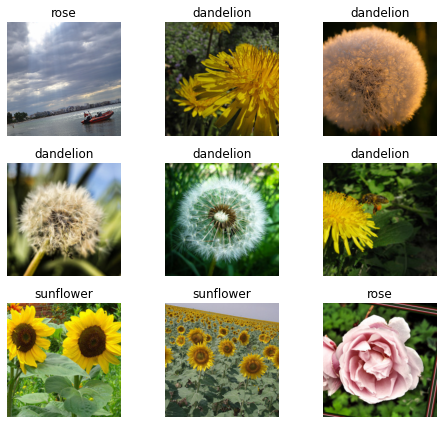

In [30]:
data.show_batch(rows=3, figsize=(7,6))

## Training

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(2)

In [0]:
learn.save("stage-1-flower_recog")

## Results

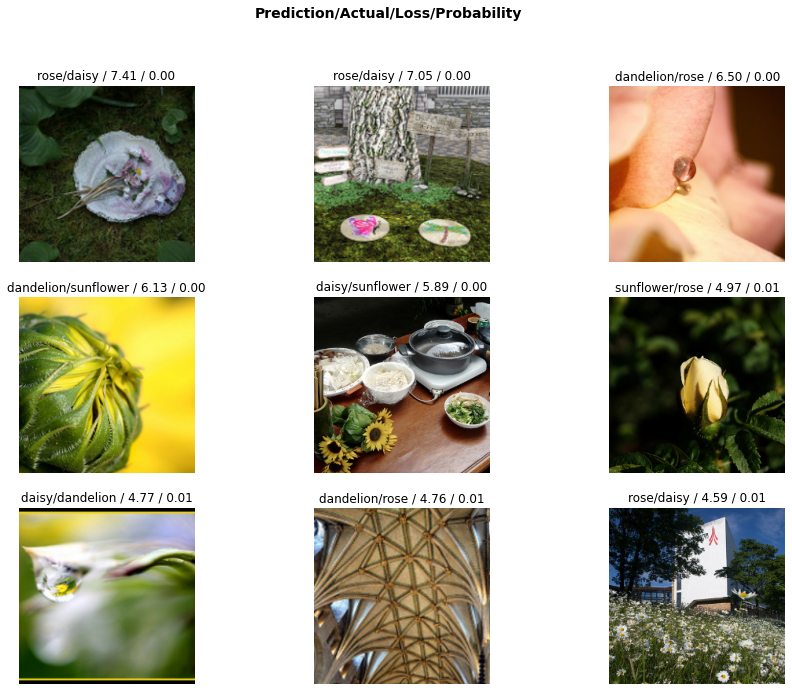

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

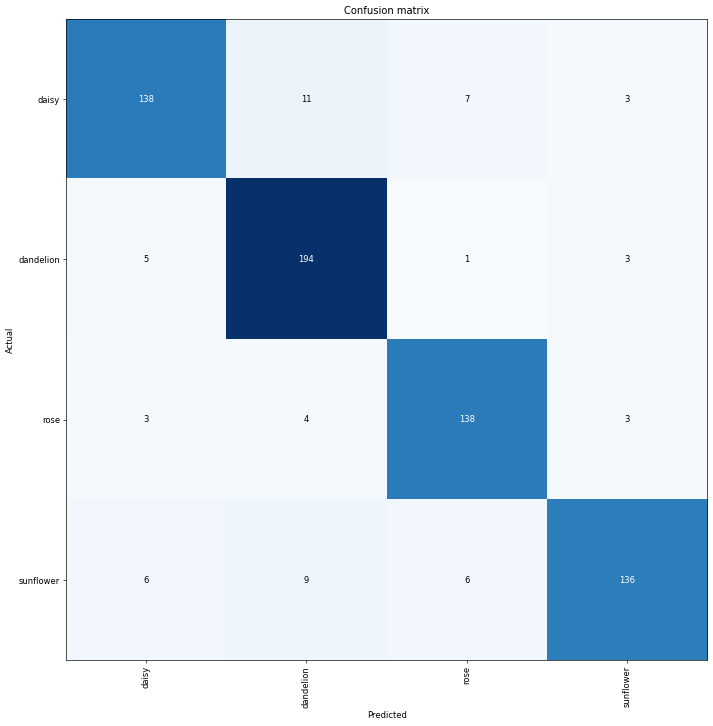

In [35]:
interp.plot_confusion_matrix(figsize=(12,12))

In [36]:
interp.most_confused(min_val=2)

[('daisy', 'dandelion', 11),
 ('sunflower', 'dandelion', 9),
 ('daisy', 'rose', 7),
 ('sunflower', 'daisy', 6),
 ('sunflower', 'rose', 6),
 ('dandelion', 'daisy', 5),
 ('rose', 'dandelion', 4),
 ('daisy', 'sunflower', 3),
 ('dandelion', 'sunflower', 3),
 ('rose', 'daisy', 3),
 ('rose', 'sunflower', 3)]

## Retraining

In [37]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


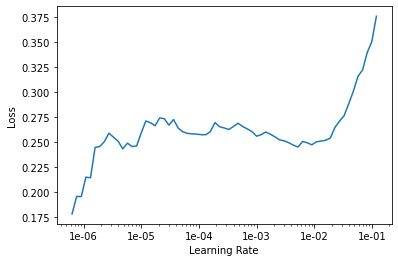

In [38]:
learn.recorder.plot()

In [39]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.275673,0.237883,0.074963,20:00
1,0.204632,0.213724,0.074963,20:00


In [0]:
learn.save("stage-2-flower_recog")

# Results Stage 2

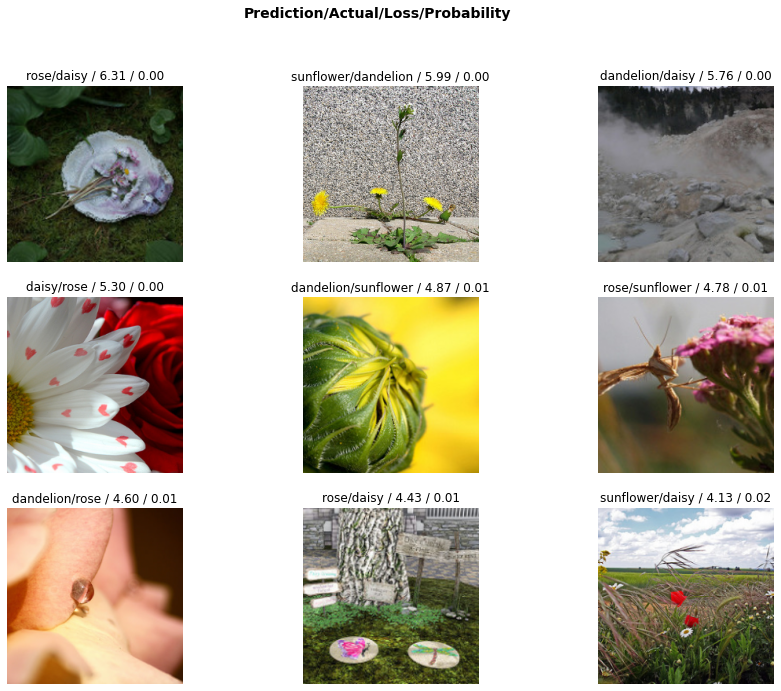

In [41]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

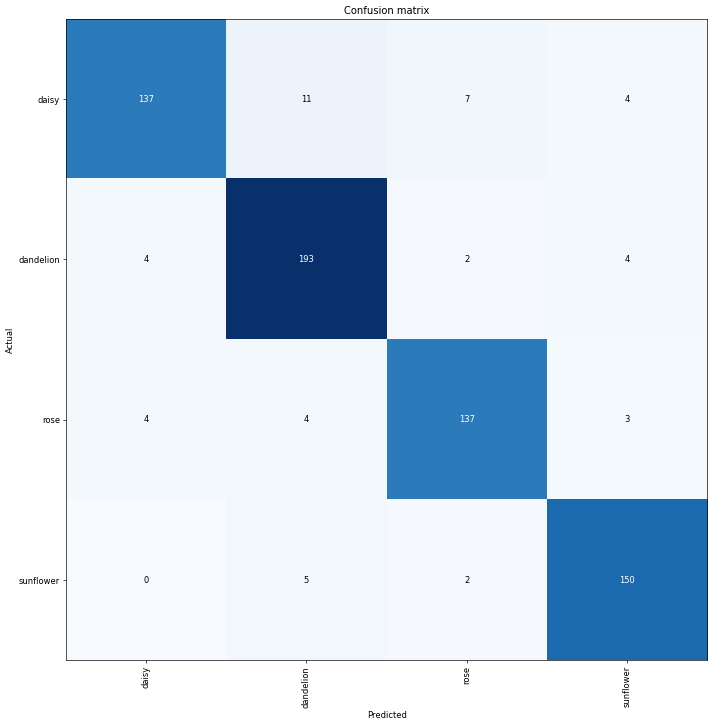

In [42]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [43]:
interp.most_confused(min_val=2)

[('daisy', 'dandelion', 11),
 ('daisy', 'rose', 7),
 ('sunflower', 'dandelion', 5),
 ('daisy', 'sunflower', 4),
 ('dandelion', 'daisy', 4),
 ('dandelion', 'sunflower', 4),
 ('rose', 'daisy', 4),
 ('rose', 'dandelion', 4),
 ('rose', 'sunflower', 3),
 ('dandelion', 'rose', 2),
 ('sunflower', 'rose', 2)]

In [0]:
learn.export()
